# Maschinelles Lernen
# Aufgabenblatt 04 - Aufgabe 03
# Prof. Dr. David Spieler

In [1]:
import csv
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plot
import numpy as np

matplotlib.rcParams['figure.figsize'] = (14, 12)

In [2]:
def load_data(filename):
    """
    load a 2-d dataset with labels from a csv file in the format y,x1,x2
    and outputs three numpy arrays for the x1, x2, and y values where the labels
    have been converted to {0.0, 1.0}
    """
    with open(filename, 'r') as csvfile:
        pointreader = csv.reader(csvfile, delimiter=',')
        x1 = []
        x2 = []
        y = []
        for row in pointreader:
            x1.append(float(row[1]))
            x2.append(float(row[2]))
            y.append(0.0 if float(row[0]) == -1.0 else 1.0)
    return np.array(x1), np.array(x2), np.array(y)

# load linearly seperable dataset https://github.com/cuekoo/Binary-classification-dataset
x1, x2, y = load_data('linsep.csv')

# shuffle data to prevent unwanted effects during learning
s = np.arange(x1.shape[0])
np.random.shuffle(s)
x1 = x1[s]
x2 = x2[s]
y = y[s]

# Überblick

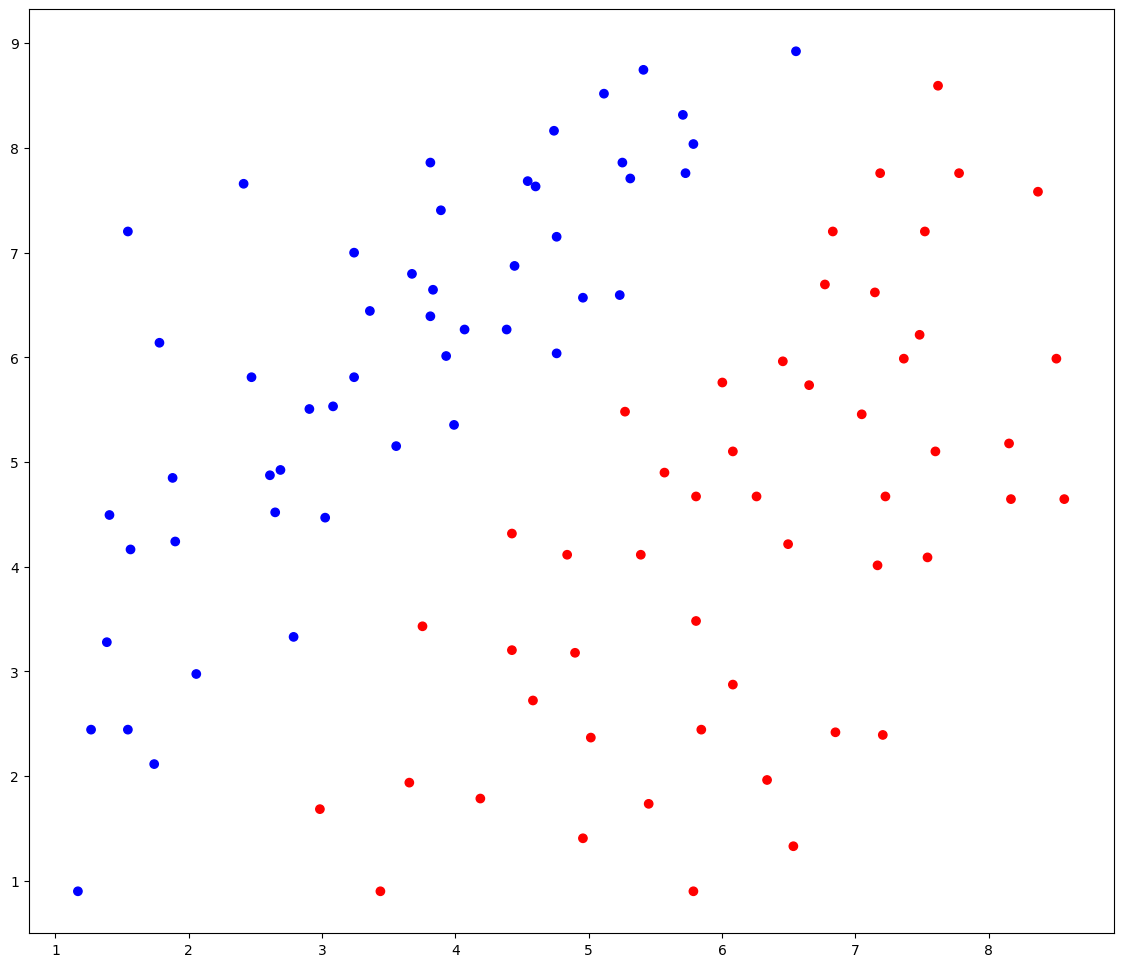

In [3]:
plot.scatter(x1, x2, c=y, cmap=matplotlib.colors.ListedColormap(['red', 'blue']))

# 4.2)

# Der Datensatz wird in zwei Klassen aufgeteilt. Wenn die Daten in der Haelfte links oben sind, werden sie der blauen Klasse zugeordnet. Die Daten rechts unten der roten Klassen. 

# Implementierung

In [4]:
def perceptron_classify(x1, x2, w):
    """
    classify a 2-d data point [x1,x2]^T via the weights w=[w0,w1,w2]^T
    """
    w0, w1, w2 = w
    result = w0 + w1 * x1 + w2 * x2
    return 1 if result > 0 else 0
    
def perceptron_visualize(x1, x2, y, w):
    """
    scatter plot the data points and add a plot of the decision surface
    """
    plot.figure()
    plot.scatter(x1, x2, c=y, cmap=matplotlib.colors.ListedColormap(['red', 'blue']))
    plot.plot([x1.min(), x1.max()], [-(w[0] + w[1] * x1.min()) / w[2] , -(w[0] + w[1] * x1.max()) / w[2]])
    
def perceptron_learn_step(x1, x2, y, w):
    """
    perform a full perceptron learning step over all data points [x1_i,x2_i]^T 
    with labels y_i, update the weights w accordingly and return the new weights
    """
    w0, w1, w2 = w
    for i in range(len(x1)):
        data_class = perceptron_classify(x1[i], x2[i], w) 
        if not data_class == y[i]:
            w0 = w0 + (y[i] - data_class) * 1
            w1 = w1 + (y[i] - data_class) * x1[i]
            w2 = w2 + (y[i] - data_class) * x2[i]
    w = [w0,w1,w2]

    return w

def perceptron_accuracy(x1, x2, y, w):
    """
    compute the accuracy when applying the perceptron with weights w to all 
    data points [x1_i,x2_i]^T with labels y_i
    """ 
    classification_sum = 0
    w0, w1, w2 = w
    for i in range(len(x1)):
        classification_sum += abs(y[i] - perceptron_classify(x1[i], x2[i], w))

    n = len(x1)
    accuracy = 1/n * classification_sum
    return accuracy

def perceptron_learn(x1, x2, y, gamma):
    """
    implementation of the perceptron learning algorithm on data points 
    [x1_i,x2_i]^T with labels y_i with accuracy threshold gamma and visualization
    every 10 iterations
    """
    w = [0,0,0] 
    i = 0
    n = len(x1)
    accuracy = perceptron_accuracy(x1, x2, y, w)
    while accuracy > gamma:
        w = perceptron_learn_step(x1, x2, y, w)
        i += 1
        if i % 10 == 0:
            perceptron_visualize(x1, x2, y, w)

        accuracy = perceptron_accuracy(x1, x2, y, w)

    return w, i

# Training

13
[27.0, -456.3301000000003, 373.4870000000005]


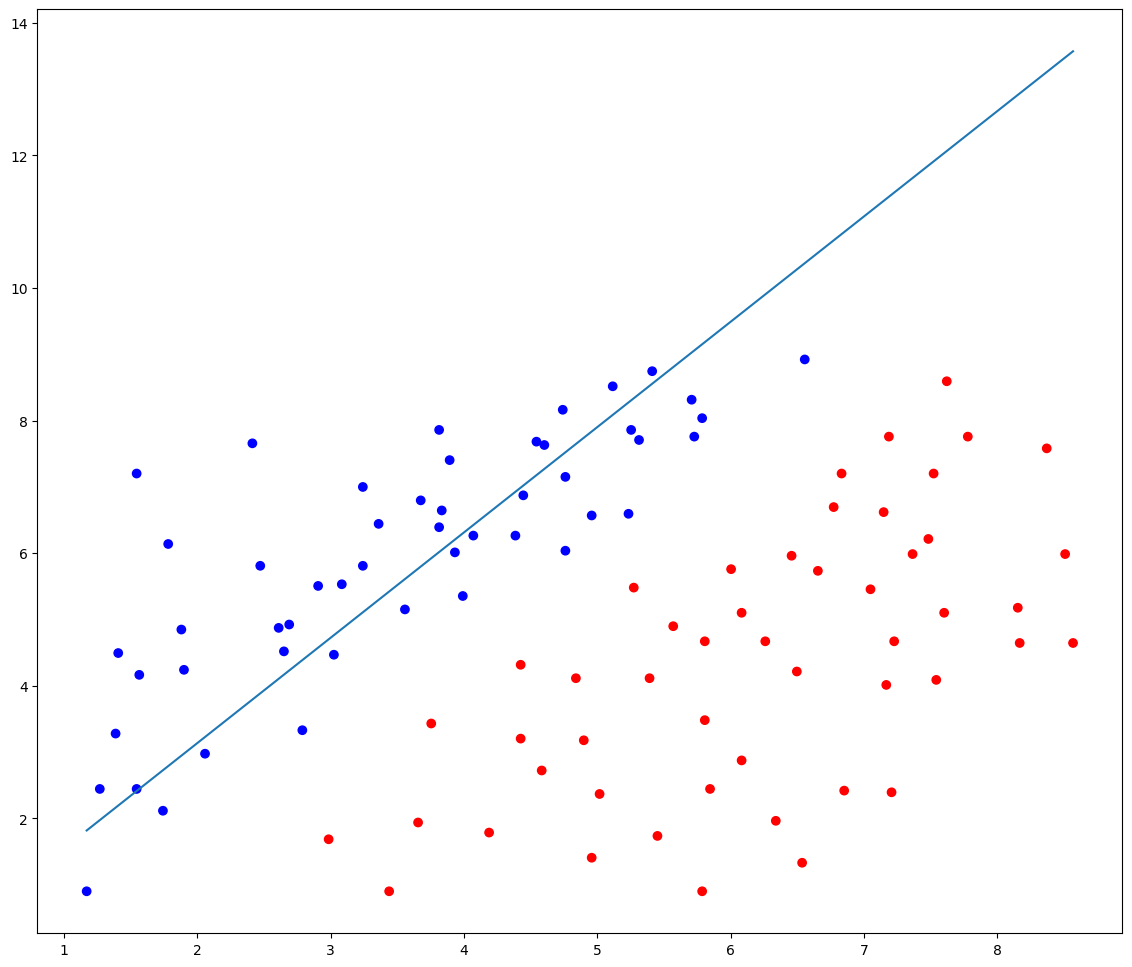

In [5]:
w, i = perceptron_learn(x1, x2, y, 0.02)

print(i)
print(w)

# 3.4)
# Es werden 181 Iterationen für eine vollständige Genauigkeit benötigt